C:\Users\Enzo\AppData\Local\Temp\ipykernel_22188\422579217.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


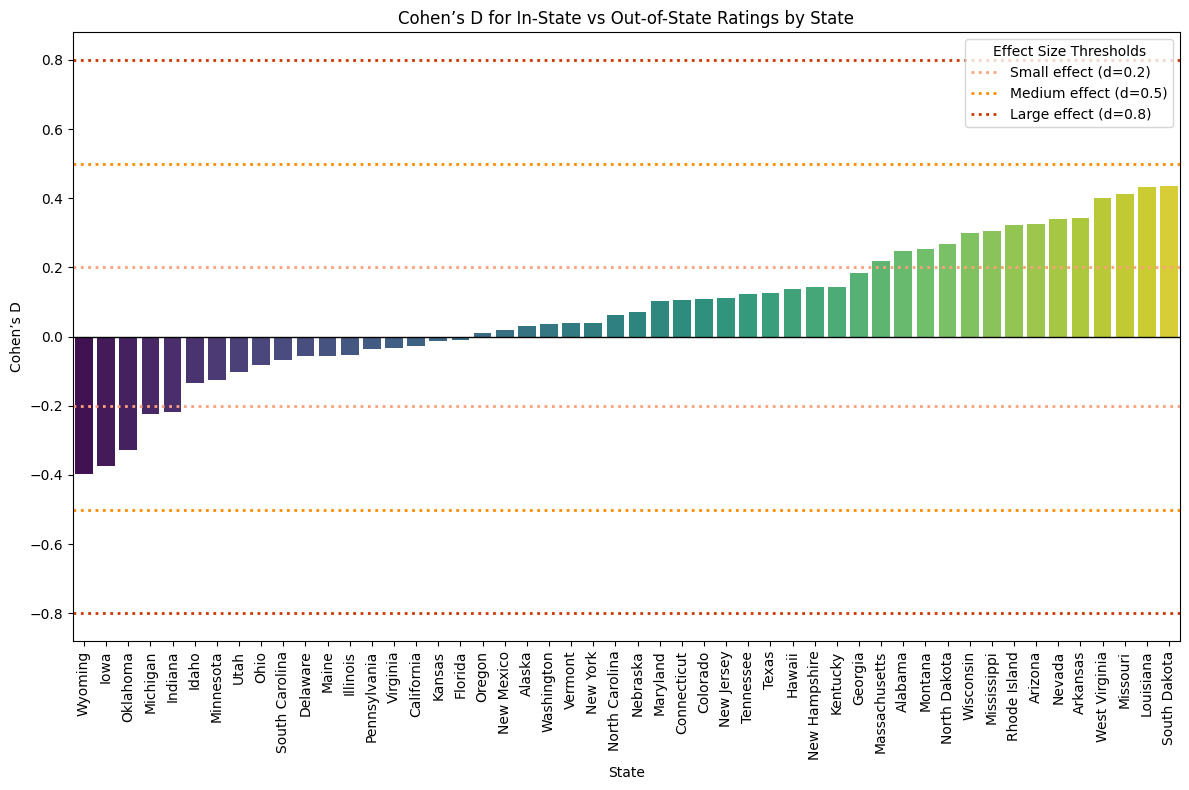

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math



US_ratings = pd.read_csv('USData/BA_US_states_all.csv')

def cohen_d(x, y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    nx, ny = len(x), len(y)
    mean_x, mean_y = np.mean(x), np.mean(y)
    std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1) 
    pooled_std = np.sqrt(((nx - 1) * std_x ** 2 + (ny - 1) * std_y ** 2) / (nx + ny - 2))
    return (mean_x - mean_y) / pooled_std

US_ratings['state_IN_VS_OUT'] = np.where(
    US_ratings['user_state'] == US_ratings['beer_state'], 
    'In-State', 
    'Out-of-State'
)

unique_states = US_ratings['beer_state'].unique()
unique_states.sort()

cohen_results = {}

for state in unique_states:
    subset = US_ratings[US_ratings['beer_state'] == state]
    in_state_ratings = subset[subset['state_IN_VS_OUT'] == 'In-State']['rating']
    out_of_state_ratings = subset[subset['state_IN_VS_OUT'] == 'Out-of-State']['rating']
    
    if len(in_state_ratings) == 0 or len(out_of_state_ratings) == 0:
        cohen_results[state] = np.nan
        continue
    
    d_value = cohen_d(in_state_ratings, out_of_state_ratings)
    cohen_results[state] = d_value

cohen_df = pd.DataFrame.from_dict(cohen_results, orient='index', columns=['Cohen_d'])
cohen_df.sort_values(by='Cohen_d', inplace=True)  # Optional: sort by Cohen's D value

cohen_df_no_nan = cohen_df.dropna()

plt.figure(figsize=(12, 8))

sns.barplot(
    x=cohen_df_no_nan.index, 
    y='Cohen_d', 
    data=cohen_df_no_nan, 
    palette='viridis'
)

plt.axhline(y=0, color='black', linewidth=1)

plt.axhline(y=0.2, color='#FFA07A', linestyle=':', linewidth=2, label='Small effect (d=0.2)')
plt.axhline(y=-0.2, color='#FFA07A', linestyle=':', linewidth=2)
plt.axhline(y=0.5, color='#FF8C00', linestyle=':', linewidth=2, label='Medium effect (d=0.5)')
plt.axhline(y=-0.5, color='#FF8C00', linestyle=':', linewidth=2)
plt.axhline(y=0.8, color='#CD3700', linestyle=':', linewidth=2, label='Large effect (d=0.8)')
plt.axhline(y=-0.8, color='#CD3700', linestyle=':', linewidth=2)

plt.xlabel('State')
plt.ylabel('Cohen’s D')
plt.title('Cohen’s D for In-State vs Out-of-State Ratings by State')
plt.xticks(rotation=90)
plt.legend(title='Effect Size Thresholds', loc='upper right')
plt.tight_layout()

plt.savefig("modules/6.png")